In [132]:
#import required libraries
import sys
import os

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [62]:
#function to read prediction data file. Generally expeceted to have format of label,probability score
def read_pred_file(fl_name):
    df = pd.read_csv( fl_name)
    col1 = df.columns[0]
    print("[%d] records loaded from File[%s] " % (df[col1].count(),fl_name))
    
    return df

In [170]:
#set key variables.
ddir = '/disk1/data1/data/models/inception/'
#model_name = 'incep_v3_he_wce_w25.cpkt'
model_name = 'incep_v3_he_da_wce10.cpkt'
steps = '79000'
pred_df_fl = ddir + model_name + '-' + steps + '_df.csv'



Executing command - [grep 'step ' /tmp/he_wce_da.out | cut -d ' ' -f4,5,10 | sed  's/ loss=//g' | sed 's/ accu\[/,/g' | sed 's/\]//g' > /tmp/modelrun_df.csv]


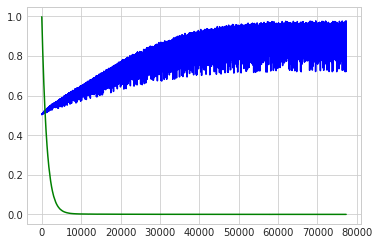

In [169]:
#scan model nohup output file for key data points.
tmp = '/tmp/'
model_log_fl = 'he_wce_da.out'
modelrun_df_fl = 'modelrun_df.csv'

def run_analysis():
    cmd = "grep 'step ' " + tmp + model_log_fl \
                + " | cut -d ' ' -f4,5,10 | sed  's/ loss=//g' | sed 's/ accu\[/,/g' | sed 's/\]//g' > " \
                + tmp + modelrun_df_fl
    print("Executing command - [{}]".format(cmd))
    os.system(cmd)
    modelrun_df = pd.read_csv( tmp + modelrun_df_fl, names=['step','loss','accu'])
    #print(df.head())
    plt.style.use('seaborn-whitegrid')
    #fig = plt.figure()
    #ax = plt.axes()
    #x = np.linspace(0, 1000, 100000)
    min = modelrun_df['loss'].min()
    max = modelrun_df['loss'].max()
    plt.plot(modelrun_df['step'],modelrun_df['accu'],color='blue');
    plt.plot(modelrun_df['step'],(modelrun_df['loss']-min)/max,color='green');
    #print(ax.plot(modelrun_df['step'],modelrun_df['loss']))
    
    return modelrun_df
    
modelrun_df = run_analysis()


In [162]:
#load data
pred_df = read_pred_file(pred_df_fl)

[104857600] records loaded from File[/disk1/data1/data/models/inception/incep_v3_he_da_wce.cpkt-77000_df.csv] 


In [163]:
#check data
print("Data columns: ",pred_df.columns)
print(pred_df.head())

Data columns:  Index(['label', 'prob'], dtype='object')
   label      prob
0    0.0  0.468994
1    0.0  0.427706
2    0.0  0.384649
3    0.0  0.435321
4    0.0  0.400247


In [164]:
#calculate ROC specific details and plot the grpah
fpr, tpr, _ = metrics.roc_curve(pred_df.label,  pred_df.prob)
auc = metrics.roc_auc_score(pred_df.label,  pred_df.prob)
print("AUC - [%f]" % (auc))

AUC - [0.500472]


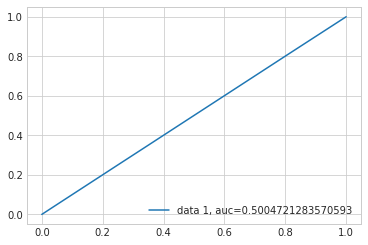

In [165]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [166]:
#Prepare predcition for confusion matrix. create prediction using optimal threshold, in our case threshold is .5
threshold = auc
#threshold = 0.1
pred_df['pred'] = pred_df.prob.apply(lambda x: 0. if x < threshold else 1.)

In [167]:
#print confusion matrix.
total = pred_df.label.count()

tot_1s = pred_df[(pred_df.label == 1.)]['label'].count()
tot_0s = pred_df[(pred_df.label == 0.)]['label'].count()
tp = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 1.)]['label'].count()
tn = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]['label'].count()
fp = pred_df[(pred_df.label == 0.) & (pred_df.pred == 1.)]['label'].count()
fn = pred_df[(pred_df.label == 1.) & (pred_df.pred == 0.)]['label'].count()
#print(" tp 1's : ",/tot_1s)
#print(" tp 0's : ",pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]['label'].count()/tot_0s)

In [168]:
'''------not weigthed CE-------
 tp:  200  fp:  13432
 fn:  1080852  tn:  73354412
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014671361502347418
 Recall:  0.00018500497663387146
 F1 score:  0.00036540225307029245
  ----------w=10---------
 tp:  67  fp:  4477
 fn:  1080985  tn:  73363367
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014744718309859154
 Recall:  6.197666717234694e-05
 F1 score:  0.00012343450049558032
 ----------w=25---------
  tp:  9087  fp:  617985
 fn:  1071965  tn:  72749859
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014491158909981629
 Recall:  0.00840570111335995
 F1 score:  0.01063974278213994
 ----------w=50---------
 tp:  26411  fp:  1791189
 fn:  1054641  tn:  71576655
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014530699823943663
 Recall:  0.024430832189385895
 F1 score:  0.018222953290012046
 ----------w=75---------
  tp:  55304  fp:  3748024
 fn:  1025748  tn:  69619820
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014540949400104329
 Recall:  0.051157576138798136
 F1 score:  0.022645248731671164
----------w=100---------
 tp:  98815  fp:  6703553
 fn:  982237  tn:  66664291
 Total labels 1's:  1081052  Total labels 0's:  73367844
 % labels 1's:  0.014520725733797315  % labels 0's:  0.9854792742662026
 Precision:  0.014526558986517637
 Recall:  0.09140633383038003
 F1 score:  0.02506906900812084
 ----------Xaviers initialization---------
 tp:  507  fp:  69893
 fn:  760209  tn:  104026991
 Total labels 1's:  760716  Total labels 0's:  104096884
 % labels 1's:  0.007254753112792969  % labels 0's:  0.992745246887207
 Precision:  0.007201704545454546
 Recall:  0.0006664773713185998
 F1 score:  0.0012200462991928925
'''
print(" tp: ",tp," fp: ",fp)
print(" fn: ",fn," tn: ",tn)
print(" Total labels 1's: ",tot_1s," Total labels 0's: ",tot_0s)
print(" % labels 1's: ",tot_1s/total," % labels 0's: ",tot_0s/total)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(" Precision: ",precision)
print(" Recall: ",recall)
print(" F1 score: ",2*precision*recall/(precision+recall))


 tp:  6678  fp:  57322
 fn:  10762611  tn:  94030989
 Total labels 1's:  10769289  Total labels 0's:  94088311
 % labels 1's:  0.10270394325256348  % labels 0's:  0.8972960567474365
 Precision:  0.10434375
 Recall:  0.0006200966470488442
 F1 score:  0.0012328665837309427


In [117]:
print(pred_df.head())
print(pred_df.pred.unique())
print(pred_df.label.unique())

   label      prob  pred
0    0.0  0.000703   0.0
1    0.0  0.000584   0.0
2    0.0  0.000564   0.0
3    0.0  0.000389   0.0
4    0.0  0.000569   0.0
[0. 1.]
[0. 1.]


In [118]:
fp_df = pred_df[(pred_df.label == 0.) & (pred_df.pred == 1.)]
fp_df.prob.describe()

count    6352.000000
mean        0.999779
std         0.000000
min         0.999779
25%         0.999779
50%         0.999779
75%         0.999779
max         0.999779
Name: prob, dtype: float64

In [119]:
fn_df = pred_df[(pred_df.label == 1.) & (pred_df.pred == 0.)]
fn_df.prob.describe()

count    760668.000000
mean          0.000454
std           0.000128
min           0.000053
25%           0.000363
50%           0.000446
75%           0.000535
max           0.001293
Name: prob, dtype: float64

In [120]:
tn_df = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 0.)]
tn_df.prob.describe()


count    1.040905e+08
mean     4.544728e-04
std      1.280784e-04
min      5.301833e-05
25%      3.632307e-04
50%      4.463196e-04
75%      5.352497e-04
max      1.292825e-03
Name: prob, dtype: float64

In [121]:
tp_df = pred_df[(pred_df.label == pred_df.pred) & (pred_df.label == 1.)]
tp_df.prob.describe()

count    48.000000
mean      0.999779
std       0.000000
min       0.999779
25%       0.999779
50%       0.999779
75%       0.999779
max       0.999779
Name: prob, dtype: float64

In [ ]:
print(tn_df.head())
print(fn_df.head())
print(tn_df.prob.describe())
print(fn_df.prob.describe())